# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [12]:
import pandas as pd

In [13]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [14]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1643k      0 --:--:-- --:--:-- --:--:-- 1643k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [15]:
import sqlite3

conn = sqlite3.connect('db/customers.sqlite')
c = conn.cursor()

In [16]:
c.execute("""select c.id, gender ,married , age,graduated,MAX(p.category),SUM(e.duration), score, COUNT(r.customer_id),segment 
from customers c 
left join experiences e on e.customer_id=c.id
left join professions p on p.id=e.profession_id 
left join relatives r on r.customer_id =c.id 
group by c.id """)
          
rows = c.fetchall()
rows

[(1, 'Male', 'No', '22', 'No', 'Healthcare', 3, 'Low', 3, 'D'),
 (2, 'Female', 'Yes', '38', 'Yes', 'Engineer', None, 'Average', 2, 'A'),
 (3, 'Female', 'Yes', '67', 'Yes', 'Engineer', 1, 'Low', 0, 'B'),
 (4, 'Male', 'Yes', '67', 'Yes', 'Lawyer', 0, 'High', 1, 'B'),
 (5, 'Female', 'Yes', '40', 'Yes', 'Entertainment', None, 'High', 5, 'A'),
 (6, 'Male', 'Yes', '56', 'No', 'Artist', 0, 'Average', 1, 'C'),
 (7, 'Male', 'No', '32', 'Yes', 'Healthcare', 2, 'Low', 2, 'C'),
 (8, 'Female', 'No', '33', 'Yes', 'Healthcare', 2, 'Low', 2, 'D'),
 (9, 'Female', 'Yes', '61', 'Yes', 'Engineer', 0, 'Low', 2, 'D'),
 (10, 'Female', 'Yes', '55', 'Yes', 'Artist', 3, 'Average', 3, 'C'),
 (11, 'Female', 'No', '26', 'Yes', 'Engineer', 2, 'Low', 2, 'A'),
 (12, 'Male', 'No', '19', 'No', 'Healthcare', 12, 'Low', 3, 'D'),
 (13, 'Female', 'No', '19', 'No', 'Executive', 0, 'Low', 0, 'D'),
 (14, 'Male', 'Yes', '70', 'No', 'Lawyer', None, 'Low', 0, 'A'),
 (15, 'Female', 'Yes', '58', 'No', 'Doctor', 0, 'Low', 0, 'B'),


In [17]:
query = """select c.id, gender ,married , age,graduated,MAX(p.category),SUM(e.duration), score, COUNT(r.customer_id),segment 
from customers c 
left join experiences e on e.customer_id=c.id
left join professions p on p.id=e.profession_id 
left join relatives r on r.customer_id =c.id 
group by c.id """

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [18]:
data=pd.DataFrame(rows,columns=['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'])

In [19]:
data.shape

(8068, 10)

In [20]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,Male,No,22,No,Healthcare,3.0,Low,3,D
1,2,Female,Yes,38,Yes,Engineer,NaN,Average,2,A
2,3,Female,Yes,67,Yes,Engineer,1.0,Low,0,B
3,4,Male,Yes,67,Yes,Lawyer,0.0,High,1,B
4,5,Female,Yes,40,Yes,Entertainment,NaN,High,5,A
5,6,Male,Yes,56,No,Artist,0.0,Average,1,C
6,7,Male,No,32,Yes,Healthcare,2.0,Low,2,C
7,8,Female,No,33,Yes,Healthcare,2.0,Low,2,D
8,9,Female,Yes,61,Yes,Engineer,0.0,Low,2,D
9,10,Female,Yes,55,Yes,Artist,3.0,Average,3,C


#### 💾 Save your results

Run the following cell to save your results.

In [21]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [22]:
import pandas as pd
customers = pd.read_csv('../decision_science/data/customers.csv')


**💾 Save your results**

Run the following cell to save your results.

In [23]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [24]:
# Start your data analysis!

### who is the average customer ?

In [25]:
customers.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

goal is to see : who are the 4 segemts / aka profiles

from profiling we can see:
-more males than women
-more married than none
-age mean : 43 years old,
-more working than none
-mostly artists, then healtcare, entertaintment, engineer and doctors
-work expericence low
-spending score : low 2/3, average and gigh about a 1/3
-segmentation fairly even

In [26]:
import pandas_profiling
customers.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### WE WANT TO KNOW WHO ARE COMPOSING THE FOUR SEGMENTS

In [27]:
customers.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
customers.groupby('Segmentation').agg({'Gender': 'count'})

,Gender
Segmentation,
A,1972
B,1858
C,1970
D,2268


In [30]:
customers.groupby('Segmentation').agg({'Age': 'mean'})

,Age
Segmentation,
A,44.924949
B,48.200215
C,49.144162
D,33.390212


In [31]:
customers.groupby('Segmentation').agg({'Work_Experience': 'mean'})

,Work_Experience
Segmentation,
A,2.874578
B,2.378151
C,2.240771
D,3.021717


In [32]:
customers=customers.dropna()

<AxesSubplot:xlabel='Profession', ylabel='Count'>

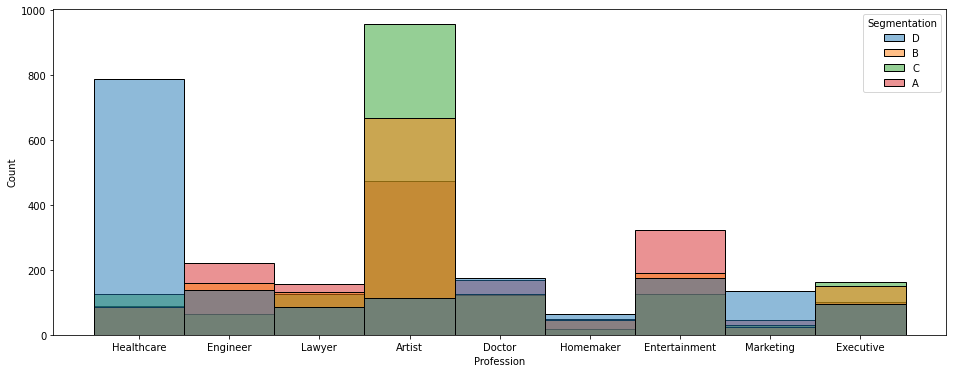

In [33]:
plt.figure(figsize=(16, 6))
sns.histplot(data=customers, x="Profession",hue="Segmentation")

In [34]:
customers_A=customers.loc[customers['Segmentation']=='A']
customers_B=customers.loc[customers['Segmentation']=='B']
customers_C=customers.loc[customers['Segmentation']=='C']
customers_D=customers.loc[customers['Segmentation']=='D']

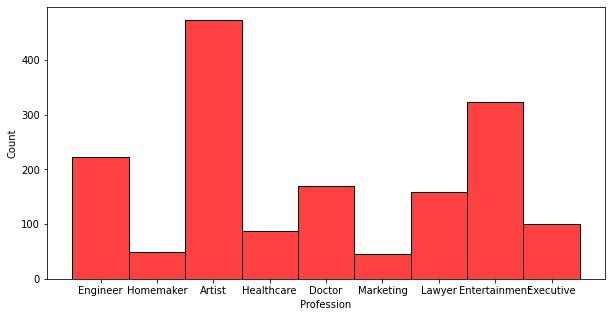

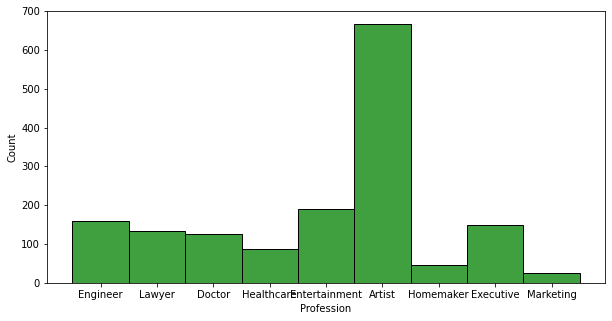

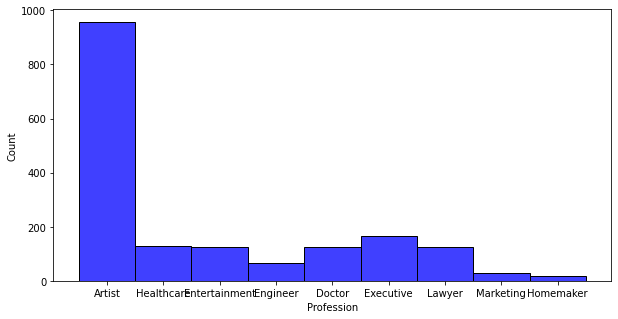

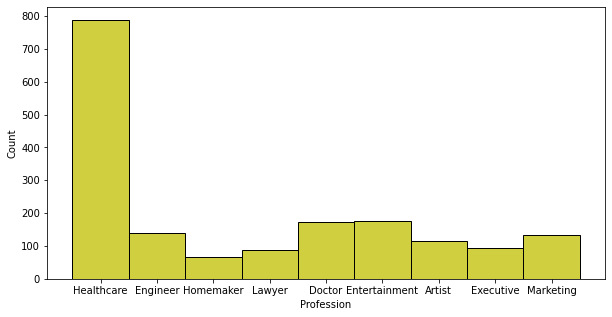

In [35]:
customers_list=[customers_A,customers_B,customers_C,customers_D]
color=['r','g','b','y']
count=0

for cust in customers_list:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=cust, x="Profession",color=color[count])
    plt.show()
    count+=1


### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [36]:
data=customers.copy()

In [37]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


We need to scale and one hot encode this data to then use a PCA and then find the number of clusters

In [38]:
data=data.drop(['ID', 'Segmentation'], axis=1)

In [39]:
data=data.dropna()

In [40]:
data.Gender.apply(lambda x: 0 if x=='Male' else 1)

0       0
2       1
3       0
5       0
6       0
       ..
8062    0
8064    0
8065    1
8066    1
8067    0
Name: Gender, Length: 6718, dtype: int64

In [41]:
#binary encoding
data.Gender=data.Gender.apply(lambda x: 0 if x=='Male' else 1)

data.Ever_Married=data.Ever_Married.apply(lambda x: 0 if x=='No' else 1)

data.Graduated=data.Graduated.apply(lambda x: 0 if x=='No' else 1)

In [42]:
#standard scaling numerical columns
from sklearn.preprocessing import StandardScaler
cols_numerical=['Age','Work_Experience','Family_Size']

for name in cols_numerical:
    scaler = StandardScaler() # Instanciate StandarScaler
    scaler.fit(data[[name]]) # Fit scaler to data
    
    data[name] = scaler.transform(data[[name]]) # Use scaler to transform data

In [43]:
#one hot encoding Professions and Spending_Score

from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(data[['Profession']]) # Fit encoder

Profession_encoded = ohe.transform(data[['Profession']]) # Encode professions

data['Artist'], data['Doctor'], data['Engineer'], data['Entertainment'], data['Executive'],data['Healthcare'], data['Homemaker'], data['Lawyer'], data['Marketing'] = Profession_encoded.T 

data=data.drop(['Profession'], axis=1)

In [44]:
data.Spending_Score.unique()

array(['Low', 'High', 'Average'], dtype=object)

In [45]:
ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(data[['Spending_Score']]) # Fit encoder

Spending_Score_encoded = ohe.transform(data[['Spending_Score']]) # Encode Spending_Score

data['Average'], data['High'], data['Low']= Spending_Score_encoded.T # Transpose encoded Alley back into dataframe

data=data.drop(['Spending_Score'], axis=1)

In [46]:
#ready for PCA
from sklearn.cluster import KMeans

Text(0.5, 0, 'k cluster number')

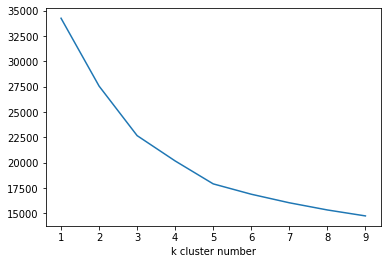

In [47]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(data)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

based on the elbow method i will pick three clusters


In [48]:
n_clusters=3

**💾 Save your results**

Run the following cell to save your results.

In [49]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [50]:
import numpy as np

In [51]:
# Load the data and display the first rows
customers_encoded = pd.read_csv('../decision_science/data/customers_encoded.csv')


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [52]:
# Test
#Null Hypothesis H0 : age mean of group D is the same
#Alternative hypo Ha: age mean of group D is lower than age mean of other groups 
#significance level : 5%
#calculate proba : groups are large enough to use CLT


In [53]:
customers_D=customers_encoded.loc[customers_encoded.is_D==1]

In [54]:
customers_D.shape

(2268, 11)

In [55]:
mean_age_base=customers_encoded.Age.mean()
mean_age_d=customers_D.Age.mean()
std_age_base=np.std(customers_encoded.Age)

In [56]:
mean_age_base

43.46690629647992

In [57]:
std_age_base

16.71066060886805

In [58]:
mean_age_d

33.39021164021164

In [59]:
# p_value

from scipy.stats import norm
X = norm(mean_age_base, std_age_base/(2268**0.5))
p_value = (X.cdf(mean_age_d)); p_value

1.1549213413027624e-181

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [60]:
# odds
p=len(customers_D)/len(customers_encoded)
odds=p/(1-p); odds

0.3910344827586207

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [61]:
customers_encoded
customers_encoded.Ever_Married=customers_encoded.Ever_Married.apply(lambda x: 0 if x=='No' else 1)
customers_encoded.Graduated=customers_encoded.Graduated.apply(lambda x: 0 if x=='No' else 1)

In [62]:
customers_encoded=customers_encoded.loc[customers_encoded.Ever_Married==1]
customers_encoded=customers_encoded.loc[customers_encoded.Graduated==1]

In [63]:
# odds_variation
import statsmodels.formula.api as smf

model = smf.logit(formula='is_D ~ Age', data=customers_encoded).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.292848
         Iterations 7


Intercept   -1.255472
Age         -0.022012
dtype: float64

In [64]:
odds_variation=np.exp(-0.022012)
odds_variation

0.9782284962388225

####  💾 Save your results

Run the following cell to save your results.

In [65]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**